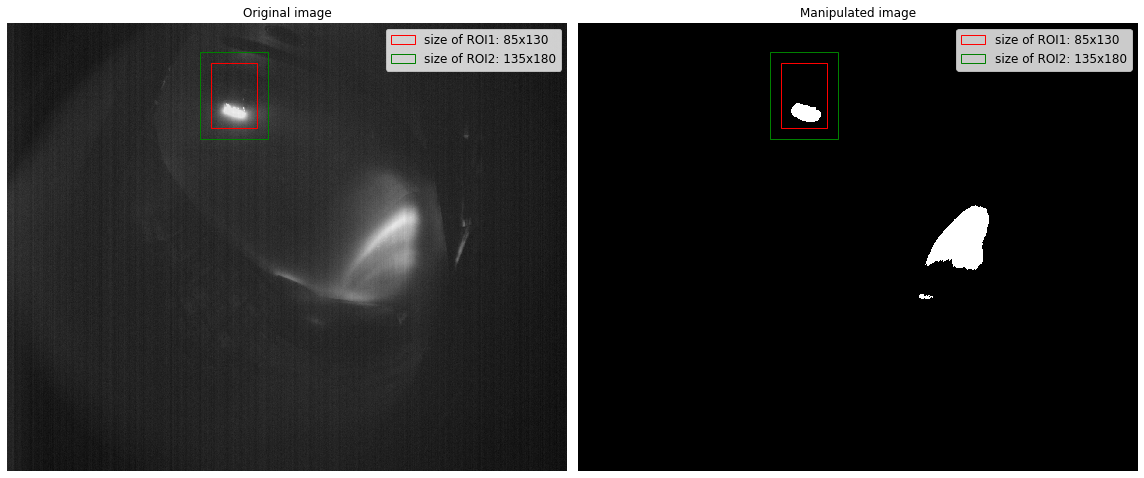

In [3]:
import matplotlib.patches as patches
from matplotlib import pyplot as plt
import numpy as np
import h5py
import cv2


# filename
File = 'AEQ31_edi_20181002_049_161934'


with h5py.File(f'C:/TDK/adatok/{File}.h5', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
        
    image0 = np.array(roip1_data[:1024, :1280, 210])
    image = image0
        
    # using median filter
    blur = cv2.medianBlur(image, 3)
        
    # binarization
    thresh = cv2.threshold(blur, 2000, 4095, cv2.THRESH_BINARY)[1]
        
    # plotting the original and the manipulated image
    plt.figure(figsize=(16,16))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image0, vmin=0, vmax=4095, cmap='gray')
    plt.title('Original image')
    plt.axis('off')
    
    ax = plt.gca()
    rect1 = patches.Rectangle((465,90),105,150,linewidth=1,edgecolor='r',facecolor='none', label='size of ROI1: 85x130')
    ax.add_patch(rect1)
    
    rect2 = patches.Rectangle((440,65),155,200,linewidth=1,edgecolor='g',facecolor='none', label='size of ROI2: 135x180')
    ax.add_patch(rect2)
    
    plt.legend(loc='upper right', fontsize=12)
    

    plt.subplot(1, 2, 2)
    plt.imshow(thresh, vmin=0, vmax=4095, cmap='gray')
    plt.title('Manipulated image')
    plt.axis('off')
    
    ax = plt.gca()
    rect1 = patches.Rectangle((465,90),105,150,linewidth=1,edgecolor='r',facecolor='none', label='size of ROI1: 85x130')
    ax.add_patch(rect1)
    
    rect2 = patches.Rectangle((440,65),155,200,linewidth=1,edgecolor='g',facecolor='none', label='size of ROI2: 135x180')
    ax.add_patch(rect2)
    
    plt.legend(loc='upper right', fontsize=12)
    
    
    plt.tight_layout()